In [336]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# 0. Pre-processing

In [337]:
df = pd.read_csv('./detailed_meals_macros_CLEANED.csv')
df.head()

,Ages,Gender,Height,Weight,Activity Level,Dietary Preference,Daily Calorie Target,Protein,Sugar,Sodium,...,Dinner Protein.1,Dinner Carbohydrates.1,Dinner Fats,Snack Suggestion,Snacks Calories,Snacks Protein,Snacks Carbohydrates,Snacks Fats,Disease,Lunch Fats
0,25,Male,180,80,Moderately Active,Omnivore,2000,120,125.0,24.0,...,60.0,250.0,60.0,Greek yogurt with fruit,150,10,20,5,Weight Gain,12.0
1,32,Female,165,65,Lightly Active,Vegetarian,1600,80,100.0,16.0,...,5.0,31.0,27.0,Apple with almond butter,180,4,30,8,"Weight Gain, Hypertension, Heart Disease",8.0
2,48,Male,175,95,Sedentary,Vegan,2200,100,150.0,20.0,...,55.0,150.0,15.0,Trail mix,300,8,34,20,Weight Gain,15.0
3,55,Female,160,70,Very Active,Omnivore,2500,140,175.0,28.0,...,20.0,163.0,27.0,Banana with peanut butter,210,5,30,9,Weight Gain,10.0
4,62,Male,170,85,Sedentary,Vegetarian,2000,80,125.0,16.0,...,6.3,186.0,22.0,Fruit and nut mix,250,6,28,15,Weight Gain,9.0


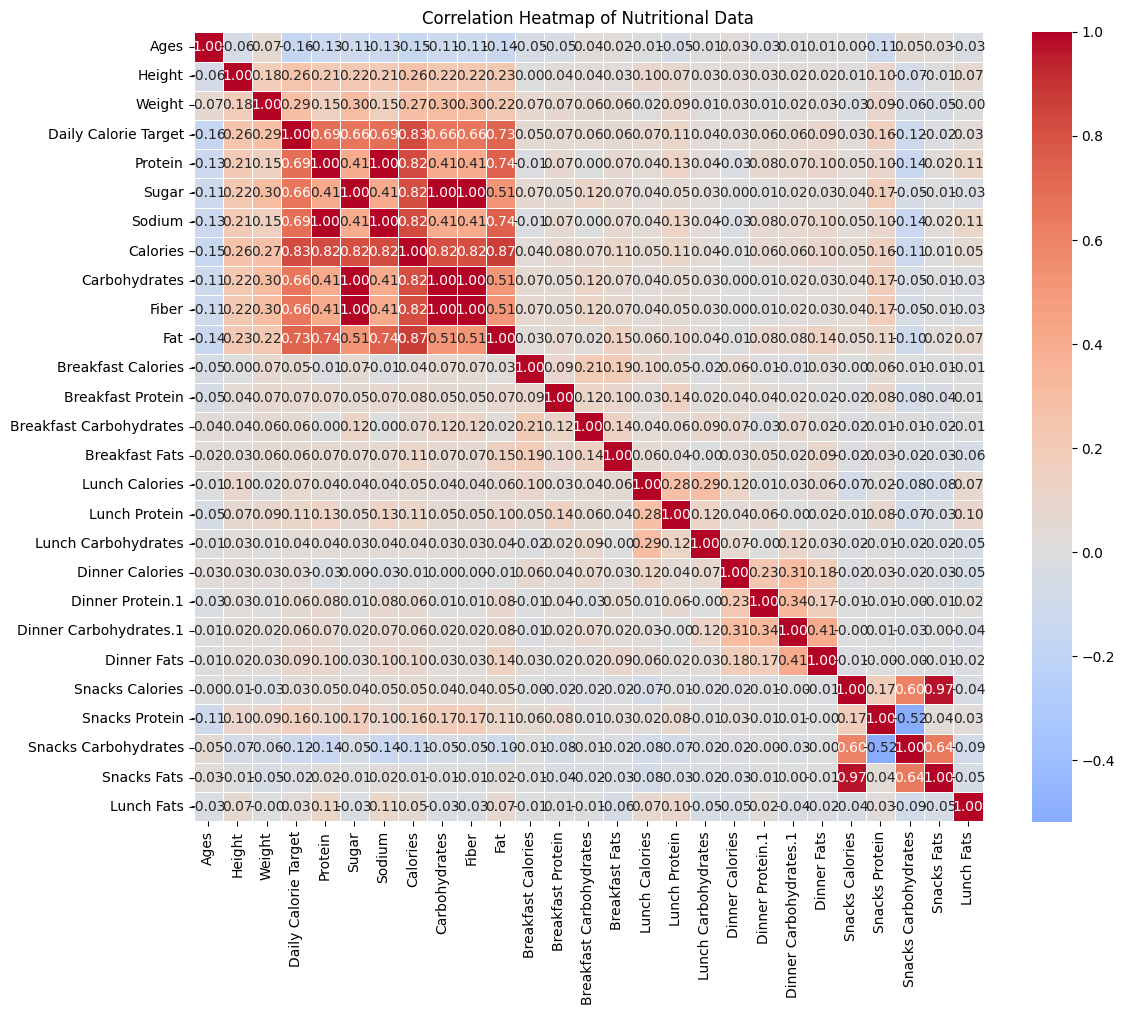

In [338]:
# Get only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Create correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Nutritional Data')
plt.tight_layout()
plt.show()

In [339]:
df_selected = df[['Ages', 'Weight', 'Height', 'Daily Calorie Target', 'Protein', 'Calories', 'Fat', 'Carbohydrates']]
df_selected.head()

,Ages,Weight,Height,Daily Calorie Target,Protein,Calories,Fat,Carbohydrates
0,25,80,180,2000,120,2020,60,250
1,32,65,165,1600,80,1480,40,200
2,48,95,175,2200,100,2185,65,300
3,55,70,160,2500,140,2680,80,350
4,62,85,170,2000,80,1815,55,250


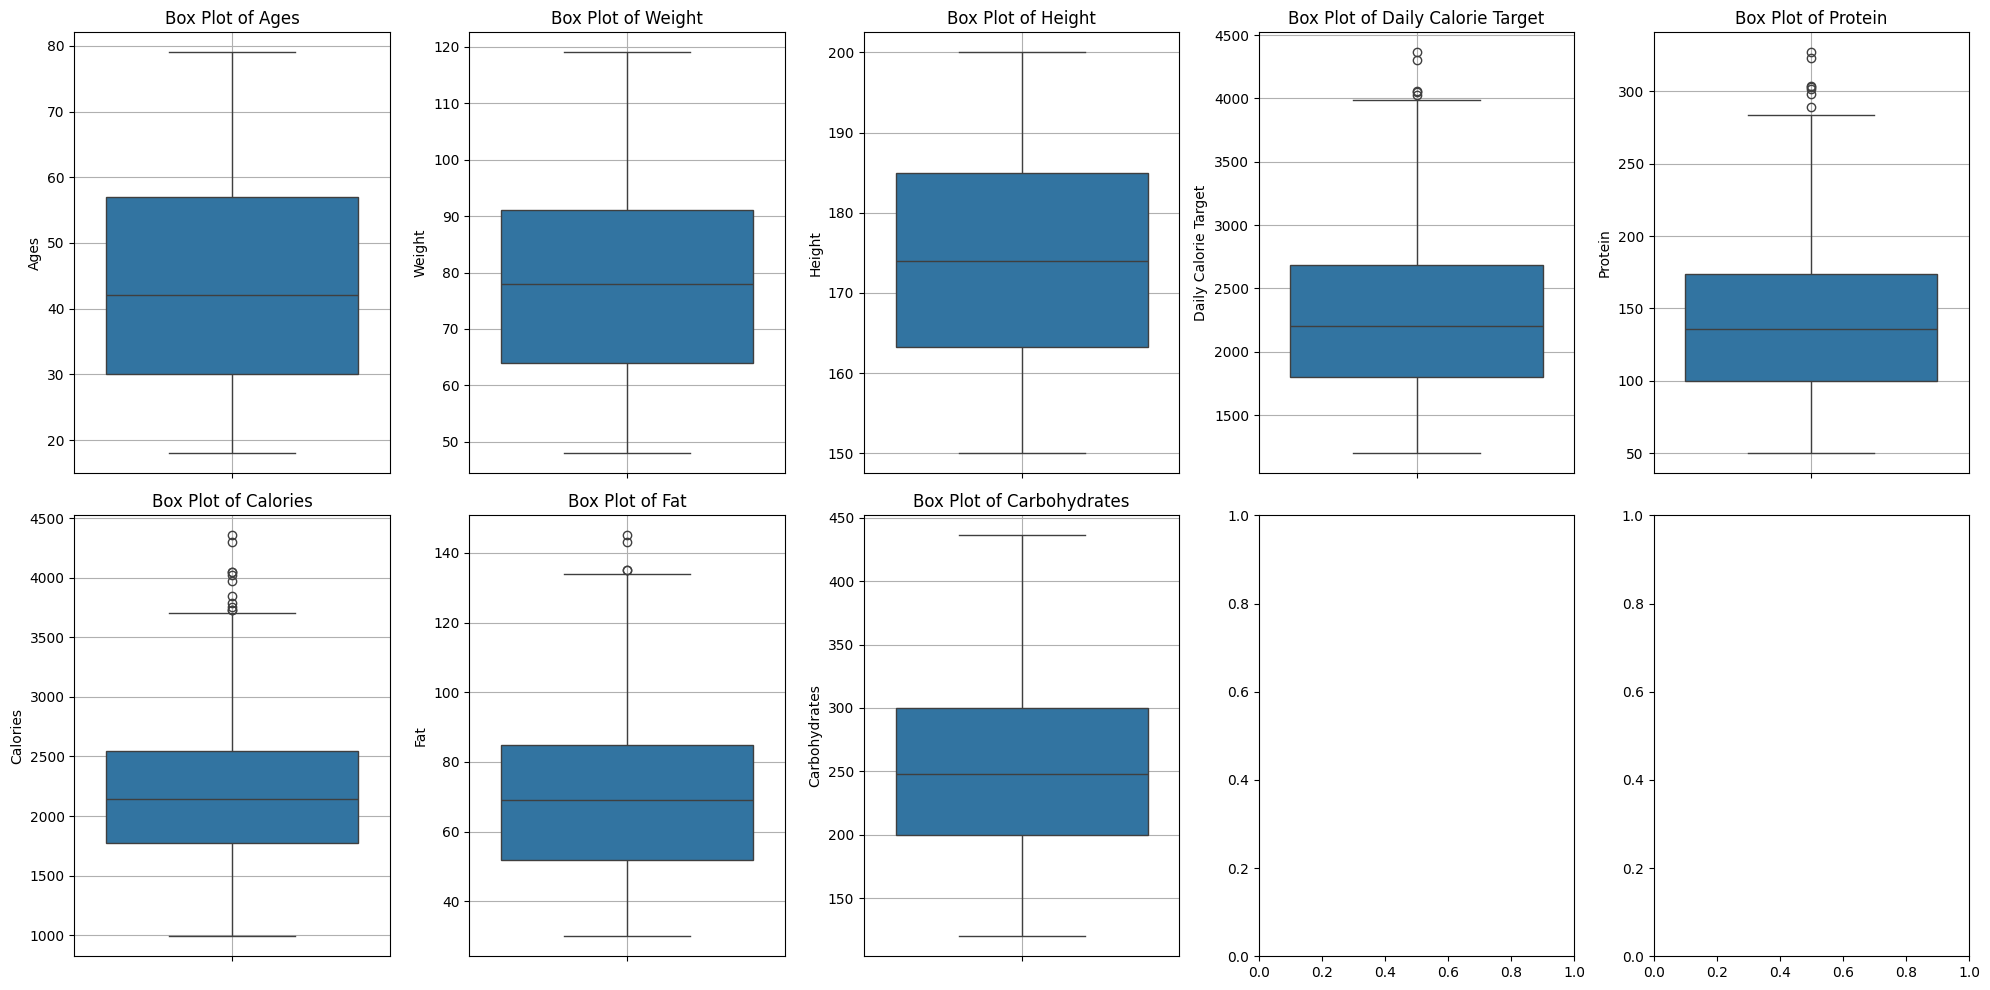

In [340]:
selected_numeric_columns = df_selected.columns
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

for i, column in enumerate(selected_numeric_columns):
    sns.boxplot(data=df_selected, y=column, ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_ylabel(column)
    axes[i].grid()

plt.tight_layout()
plt.show()


In [341]:
# remove outliers using IQR method
def remove_outliers_iqr(df, columns):
    df_cleaned = df.copy()
    
    for column in columns:
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    
    return df_cleaned

df_no_outliers = remove_outliers_iqr(df_selected, selected_numeric_columns)

print(f"Original dataset shape: {df_selected.shape}")
print(f"Dataset after removing outliers: {df_no_outliers.shape}")
print(f"Removed {df_selected.shape[0] - df_no_outliers.shape[0]} rows with outliers")

Original dataset shape: (1698, 8)
Dataset after removing outliers: (1687, 8)
Removed 11 rows with outliers


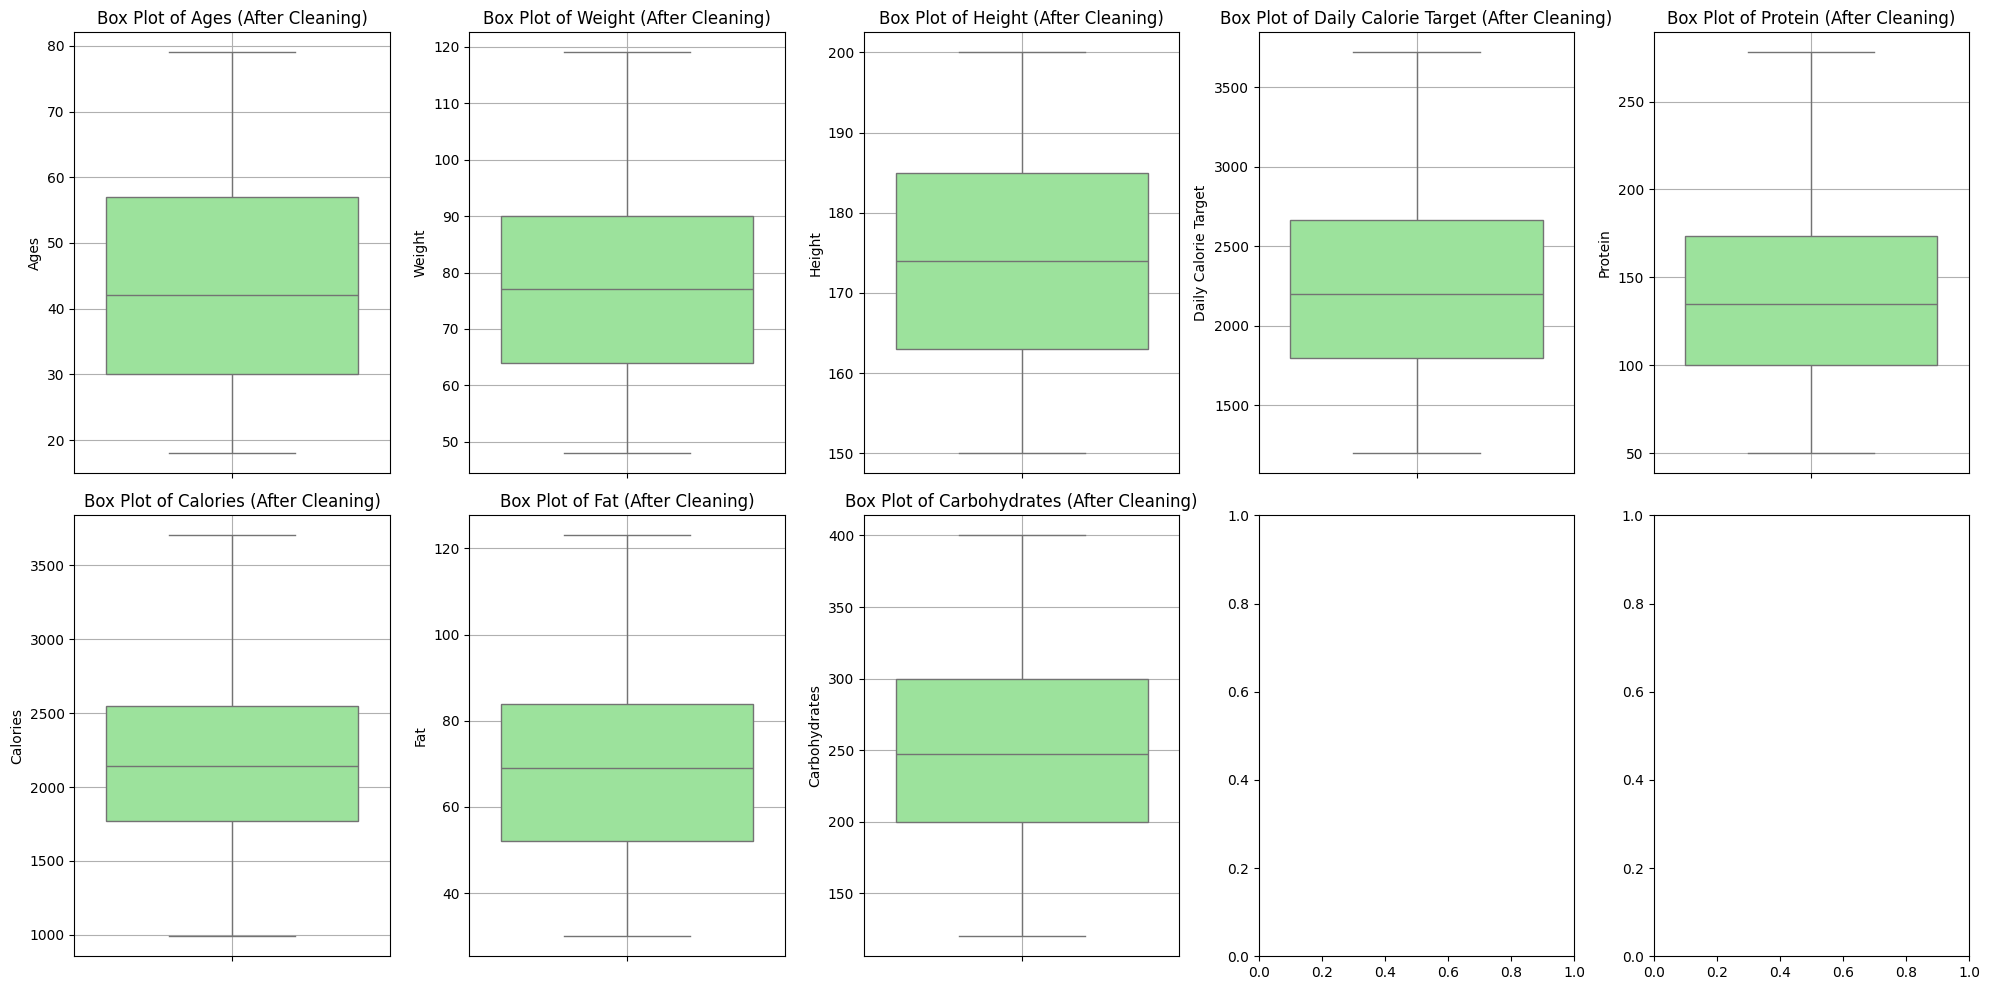

In [342]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

for i, column in enumerate(selected_numeric_columns):
    sns.boxplot(data=df_no_outliers, y=column, ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Box Plot of {column} (After Cleaning)')
    axes[i].set_ylabel(column)
    axes[i].grid()

plt.tight_layout()
plt.show()

In [343]:
# hitung BMI untuk setiap entri 
df_no_outliers['BMI'] = df_no_outliers['Weight'] / (df_no_outliers['Height'] / 100) ** 2
df_no_outliers.head()

,Ages,Weight,Height,Daily Calorie Target,Protein,Calories,Fat,Carbohydrates,BMI
0,25,80,180,2000,120,2020,60,250,24.691358
1,32,65,165,1600,80,1480,40,200,23.875115
2,48,95,175,2200,100,2185,65,300,31.020408
3,55,70,160,2500,140,2680,80,350,27.343750
4,62,85,170,2000,80,1815,55,250,29.411765


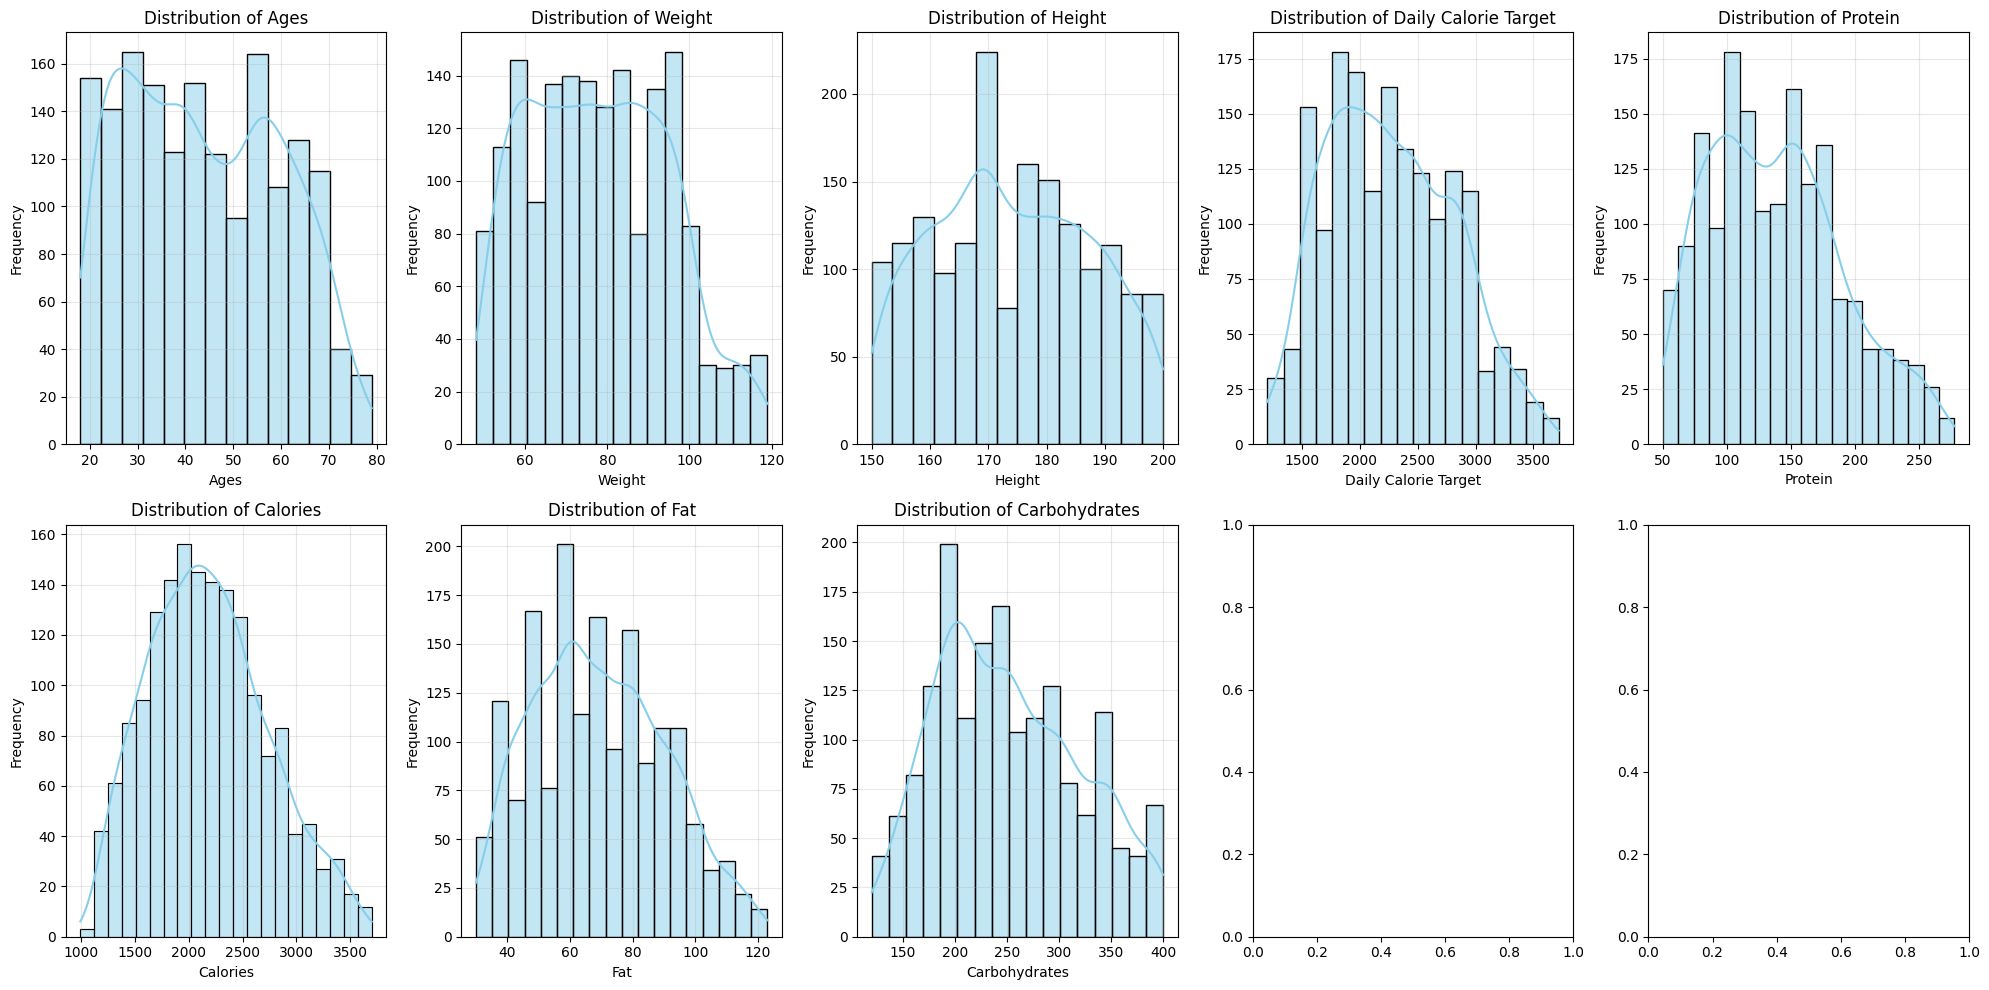

In [344]:
# Create distribution plots for all selected columns
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

for i, column in enumerate(selected_numeric_columns):
    sns.histplot(data=df_no_outliers, x=column, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# 1. Linguistic Variables and Memberships

In [345]:
def bmi_underweight(bmi):
    if bmi <= 0:
        return 1
    elif 0 < bmi < 17:
        return 1
    elif 17 <= bmi < 18.5:
        return (18.5 - bmi) / (18.5 - 17)
    else:
        return 0

def bmi_normal(bmi):
    if bmi < 17:
        return 0
    elif 17 <= bmi < 18.5:
        return (bmi - 17) / (18.5 - 17)
    elif 18.5 <= bmi < 23:
        return 1
    elif 23 <= bmi < 24.9:
        return (24.9 - bmi) / (24.9 - 23)
    else:
        return 0

def bmi_overweight(bmi):
    if bmi < 23:
        return 0
    elif 23 <= bmi < 25:
        return (bmi - 23) / (25 - 23)
    elif 25 <= bmi < 28:
        return 1
    elif 28 <= bmi < 29.9:
        return (29.9 - bmi) / (29.9 - 28)
    else:
        return 0

def bmi_obese(bmi):
    if bmi < 28:
        return 0
    elif 28 <= bmi < 30:
        return (bmi - 28) / (30 - 28)
    elif 30 <= bmi <= 40:
        return 1
    else:
        return 0

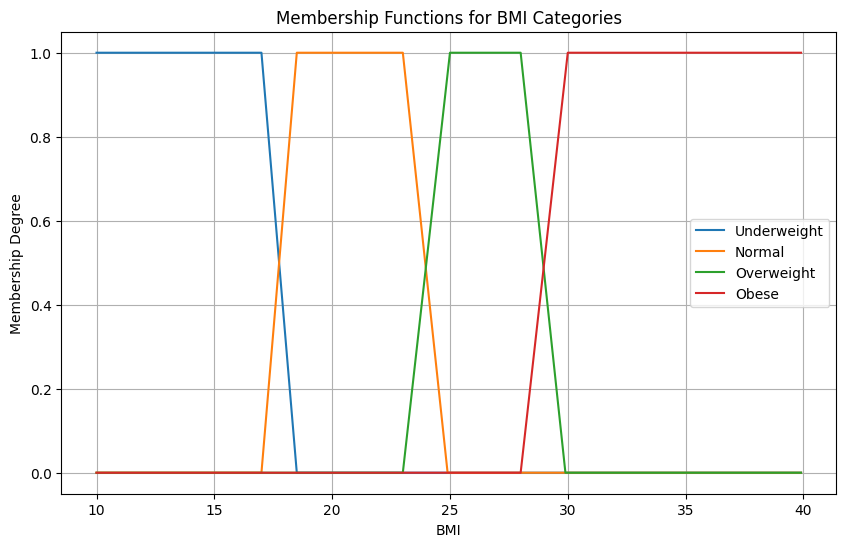

In [346]:
x_bmi = np.arange(10, 40, 0.1)

underweight = [bmi_underweight(x) for x in x_bmi]
normal = [bmi_normal(x) for x in x_bmi]
overweight = [bmi_overweight(x) for x in x_bmi]
obese = [bmi_obese(x) for x in x_bmi]

# Plot the membership functions
plt.figure(figsize=(10, 6))
plt.plot(x_bmi, underweight, label='Underweight')
plt.plot(x_bmi, normal, label='Normal')
plt.plot(x_bmi, overweight, label='Overweight')
plt.plot(x_bmi, obese, label='Obese')

plt.title('Membership Functions for BMI Categories')
plt.xlabel('BMI')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)
plt.show()

In [347]:
def young(age):
    if age <= 25: 
        return 1
    elif 25 < age <= 40:
        return (40 - age) / (40 - 25)
    else:
        return 0

def middle(age):
    if age <= 30 or age >= 60:
        return 0
    elif 30 < age <= 45:
        return (age - 30) / (45 - 30)
    elif 45 < age <= 60:
        return (60 - age) / (60 - 45)
    else:
        return 0

def senior(age):
    if age <= 50:
        return 0
    elif 50 < age <= 65:
        return (age - 50) / (65 - 50)
    elif 65 < age <= 80:
        return 1
    else:
        return 0

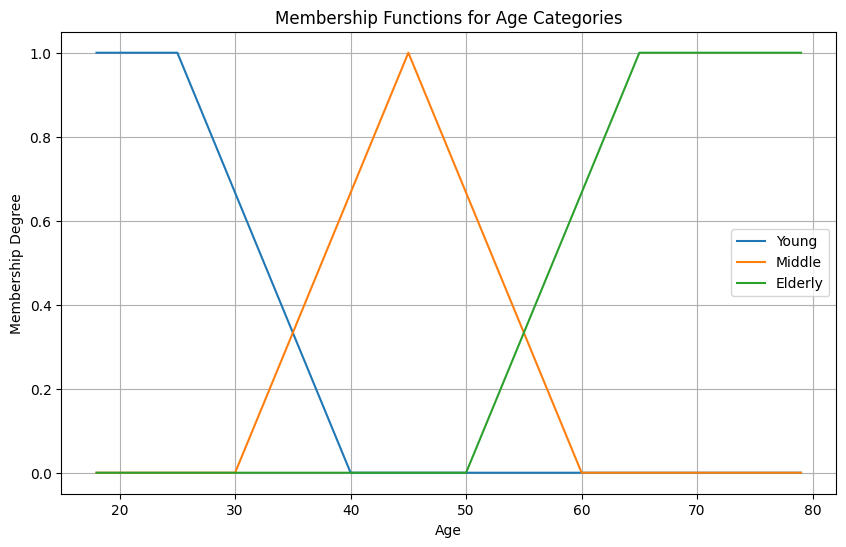

In [348]:
x_age = np.arange(18, 80, 1)
young_membership = [young(x) for x in x_age]
middle_membership = [middle(x) for x in x_age]
elderly_membership = [senior(x) for x in x_age]

# Plot the membership functions
plt.figure(figsize=(10, 6))
plt.plot(x_age, young_membership, label='Young')
plt.plot(x_age, middle_membership, label='Middle')
plt.plot(x_age, elderly_membership, label='Elderly')

plt.title('Membership Functions for Age Categories')
plt.xlabel('Age')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)
plt.show()

In [349]:
def low_calories(kcal):
    if kcal <= 1800:
        return 1
    elif 1800 < kcal <= 2000:
        return (2000 - kcal) / (2000 - 1800)
    else:
        return 0

def moderate_calories(kcal):
    if kcal <= 1600 or kcal >= 2600:
        return 0
    elif 1600 < kcal <= 2000:
        return (kcal - 1600) / (2000 - 1600)
    elif 2000 < kcal <= 2200:
        return 1
    elif 2200 < kcal <= 2600:
        return (2600 - kcal) / (2600 - 2200)
    else:
        return 0

def high_calories(kcal):
    if kcal <= 2200:
        return 0
    elif 2200 < kcal <= 2400:
        return (kcal - 2200) / (2400 - 2200)
    elif kcal > 2400:
        return 1
    else:
        return 0


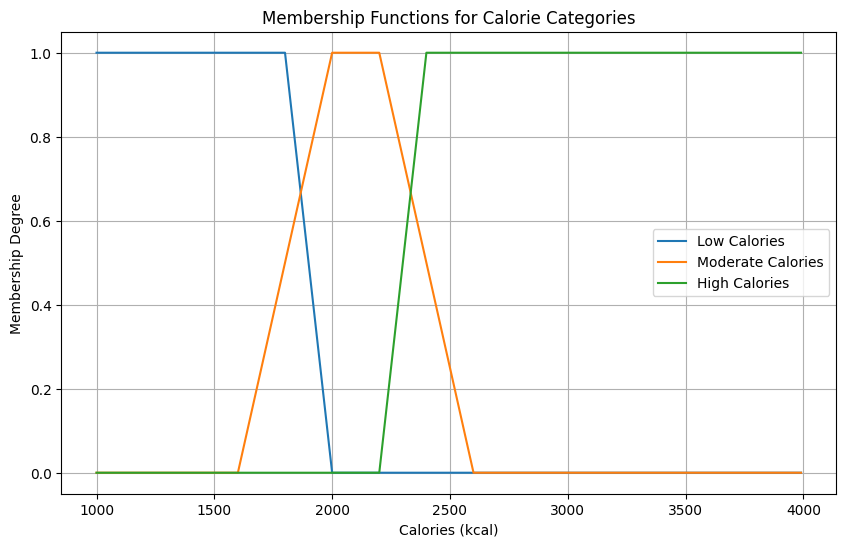

In [350]:
x_calories = np.arange(1000, 4000, 10)
low_cal_membership = [low_calories(x) for x in x_calories]
moderate_cal_membership = [moderate_calories(x) for x in x_calories]
high_cal_membership = [high_calories(x) for x in x_calories]

# Plot the membership functions
plt.figure(figsize=(10, 6))
plt.plot(x_calories, low_cal_membership, label='Low Calories')
plt.plot(x_calories, moderate_cal_membership, label='Moderate Calories')
plt.plot(x_calories, high_cal_membership, label='High Calories')

plt.title('Membership Functions for Calorie Categories')
plt.xlabel('Calories (kcal)')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)
plt.show()

In [351]:
# Insert Cell 13
# Daily Calorie Target Membership Functions
def target_low(target):
    if target <= 1800:
        return 1
    elif 1800 < target <= 2000:
        return (2000 - target) / (2000 - 1800)
    else:
        return 0

def target_moderate(target):
    if target <= 1600 or target >= 2600:
        return 0
    elif 1600 < target <= 2000:
        return (target - 1600) / (2000 - 1600)
    elif 2000 < target <= 2200:
        return 1
    elif 2200 < target <= 2600:
        return (2600 - target) / (2600 - 2200)
    else:
        return 0

def target_high(target):
    if target <= 2200:
        return 0
    elif 2200 < target <= 2400:
        return (target - 2200) / (2400 - 2200)
    elif target > 2400:
        return 1
    else:
        return 0

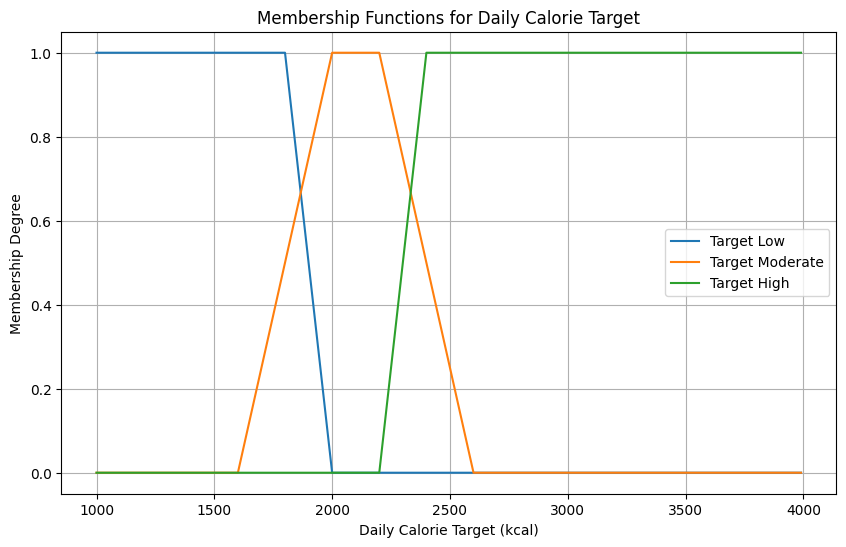

In [352]:
x_target = np.arange(1000, 4000, 10)
target_low_membership = [target_low(x) for x in x_target]
target_moderate_membership = [target_moderate(x) for x in x_target]
target_high_membership = [target_high(x) for x in x_target]

plt.figure(figsize=(10, 6))
plt.plot(x_target, target_low_membership, label='Target Low')
plt.plot(x_target, target_moderate_membership, label='Target Moderate')
plt.plot(x_target, target_high_membership, label='Target High')

plt.title('Membership Functions for Daily Calorie Target')
plt.xlabel('Daily Calorie Target (kcal)')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)
plt.show()

In [353]:
def protein_low(protein):
    if protein <= 70:
        return 1
    elif 70 < protein <= 100:
        return (100 - protein) / (100 - 70)
    else:
        return 0

def protein_moderate(protein):
    if protein <= 70 or protein >= 140:
        return 0
    elif 70 < protein <= 100:
        return (protein - 70) / (100 - 70)
    elif 100 < protein <= 140:
        return (140 - protein) / (140 - 100)
    else:
        return 0

def protein_high(protein):
    if protein <= 120:
        return 0
    elif 120 < protein <= 150:
        return (protein - 120) / (150 - 120)
    else:
        return 1

def carbs_low(carbs):
    if carbs <= 180:
        return 1
    elif 180 < carbs <= 250:
        return (250 - carbs) / (250 - 180)
    else:
        return 0

def carbs_moderate(carbs):
    if carbs <= 180 or carbs >= 350:
        return 0
    elif 180 < carbs <= 250:
        return (carbs - 180) / (250 - 180)
    elif 250 < carbs <= 350:
        return (350 - carbs) / (350 - 250)
    else:
        return 0

def carbs_high(carbs):
    if carbs <= 300:
        return 0
    elif 300 < carbs <= 350:
        return (carbs - 300) / (350 - 300)
    else:
        return 1

def fat_low(fat):
    if fat <= 45:
        return 1
    elif 45 < fat <= 65:
        return (65 - fat) / (65 - 45)
    else:
        return 0

def fat_moderate(fat):
    if fat <= 45 or fat >= 85:
        return 0
    elif 45 < fat <= 65:
        return (fat - 45) / (65 - 45)
    elif 65 < fat <= 85:
        return (85 - fat) / (85 - 65)
    else:
        return 0

def fat_high(fat):
    if fat <= 75:
        return 0
    elif 75 < fat <= 90:
        return (fat - 75) / (90 - 75)
    else:
        return 1


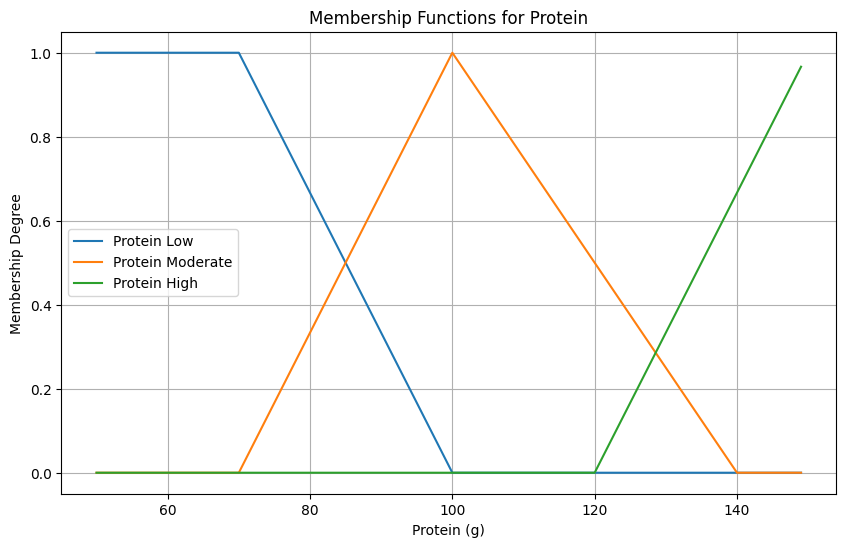

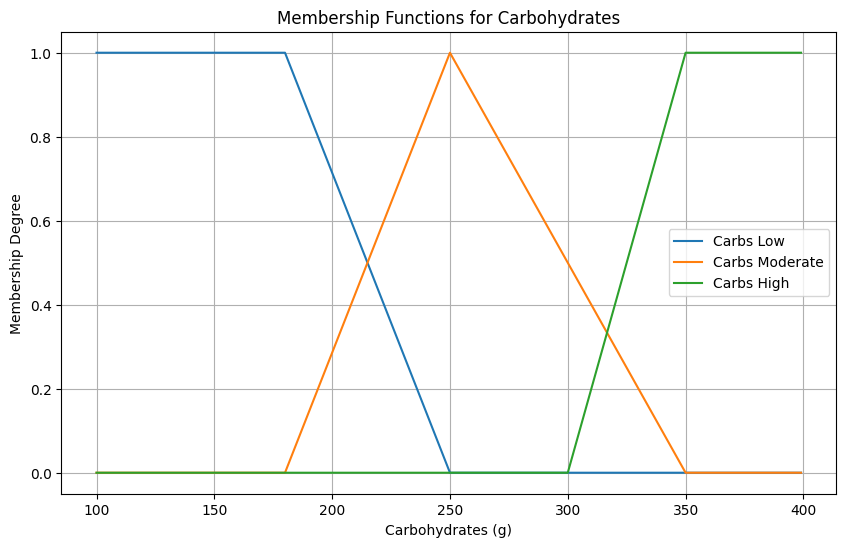

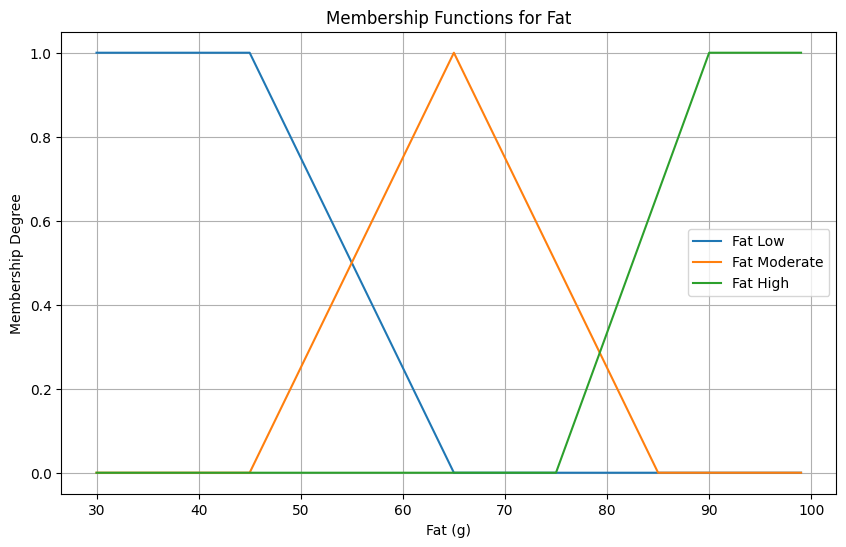

In [354]:
x_protein = np.arange(50, 150, 1)
protein_low_membership = [protein_low(x) for x in x_protein]
protein_moderate_membership = [protein_moderate(x) for x in x_protein]
protein_high_membership = [protein_high(x) for x in x_protein]

plt.figure(figsize=(10, 6))
plt.plot(x_protein, protein_low_membership, label='Protein Low')
plt.plot(x_protein, protein_moderate_membership, label='Protein Moderate')
plt.plot(x_protein, protein_high_membership, label='Protein High')

plt.title('Membership Functions for Protein')
plt.xlabel('Protein (g)')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)
plt.show()

# Carbohydrates Visualization
x_carbs = np.arange(100, 400, 1)
carbs_low_membership = [carbs_low(x) for x in x_carbs]
carbs_moderate_membership = [carbs_moderate(x) for x in x_carbs]
carbs_high_membership = [carbs_high(x) for x in x_carbs]

plt.figure(figsize=(10, 6))
plt.plot(x_carbs, carbs_low_membership, label='Carbs Low')
plt.plot(x_carbs, carbs_moderate_membership, label='Carbs Moderate')
plt.plot(x_carbs, carbs_high_membership, label='Carbs High')

plt.title('Membership Functions for Carbohydrates')
plt.xlabel('Carbohydrates (g)')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)
plt.show()

# Fat Visualization
x_fat = np.arange(30, 100, 1)
fat_low_membership = [fat_low(x) for x in x_fat]
fat_moderate_membership = [fat_moderate(x) for x in x_fat]
fat_high_membership = [fat_high(x) for x in x_fat]

plt.figure(figsize=(10, 6))
plt.plot(x_fat, fat_low_membership, label='Fat Low')
plt.plot(x_fat, fat_moderate_membership, label='Fat Moderate')
plt.plot(x_fat, fat_high_membership, label='Fat High')

plt.title('Membership Functions for Fat')
plt.xlabel('Fat (g)')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)
plt.show()

# 2. Fuzzification

In [355]:
def fuzzify_bmi(bmi_value):
    return {
        'underweight': bmi_underweight(bmi_value),
        'normal': bmi_normal(bmi_value),
        'overweight': bmi_overweight(bmi_value),
        'obese': bmi_obese(bmi_value)
    }

def fuzzify_age(age_value):
    return {
        'young': young(age_value),
        'middle': middle(age_value),
        'senior': senior(age_value)
    }

def fuzzify_calorie_target(target_value):
    return {
        'target_low': target_low(target_value),
        'target_moderate': target_moderate(target_value),
        'target_high': target_high(target_value)
    }

def fuzzify_calories(calorie_value):
    return {
        'cal_low': low_calories(calorie_value),
        'cal_moderate': moderate_calories(calorie_value),
        'cal_high': high_calories(calorie_value),
    }

def fuzzify_protein(protein_value):
    return {
        'prot_low': protein_low(protein_value),
        'prot_moderate': protein_moderate(protein_value),
        'prot_high': protein_high(protein_value),
    }

def fuzzify_carbs(carbs_value):
    return {
        'carb_low': carbs_low(carbs_value),
        'carb_moderate': carbs_moderate(carbs_value),
        'carb_high': carbs_high(carbs_value),
    }

def fuzzify_fat(fat_value):
    return {
        'fat_low': fat_low(fat_value),
        'fat_moderate': fat_moderate(fat_value),
        'fat_high': fat_high(fat_value),
    }


def bmi_fuzzification(bmi):
    fuzzified_bmi = fuzzify_bmi(bmi)
    df = pd.DataFrame([fuzzified_bmi])
    df.index = [f"BMI: {bmi}"]
    return df

def age_fuzzification(age):
    fuzzified_age = fuzzify_age(age)
    df = pd.DataFrame([fuzzified_age])
    df.index = [f"Age: {age}"]
    return df

def calorie_fuzzification(calories):
    fuzzified_calories = fuzzify_calories(calories)
    df = pd.DataFrame([fuzzified_calories])
    df.index = [f"Calories: {calories}"]
    return df

def target_fuzzification(target):
    fuzzified_target = fuzzify_calorie_target(target)
    df = pd.DataFrame([fuzzified_target])
    df.index = [f"Target: {target}"]
    return df

def protein_fuzzification(protein):
    fuzzified_protein = fuzzify_protein(protein)
    df = pd.DataFrame([fuzzified_protein])
    df.index = [f"Protein: {protein}"]
    return df

def carbs_fuzzification(carbs):
    fuzzified_carbs = fuzzify_carbs(carbs)
    df = pd.DataFrame([fuzzified_carbs])
    df.index = [f"Carbs: {carbs}"]
    return df

def fat_fuzzification(fat):
    fuzzified_fat = fuzzify_fat(fat)
    df = pd.DataFrame([fuzzified_fat])
    df.index = [f"Fat: {fat}"]
    return df

In [356]:
bmi_fuzzification(22.5)

,underweight,normal,overweight,obese
BMI: 22.5,0,1,0,0


In [357]:
age_fuzzification(30)

,young,middle,senior
Age: 30,0.666667,0,0


In [358]:
calorie_fuzzification(1850)

,cal_low,cal_moderate,cal_high
Calories: 1850,0.75,0.625,0


# 3. Inference

In [359]:
bmi_terms = {
    "underweight": bmi_underweight, 
    "normal": bmi_normal,
    "overweight": bmi_overweight,
    "obese": bmi_obese,
}

age_terms = {
    "young": young,
    "middle": middle,
    "senior": senior,
}

# output terms
calorie_terms = {
    "low": low_calories,
    "moderate": moderate_calories,
    "high": high_calories,
}

# Output Terms
calorie_output_terms = ["cal_low", "cal_moderate", "cal_high"]
protein_output_terms = ["prot_low", "prot_moderate", "prot_high"] 
carbs_output_terms = ["carb_low", "carb_moderate", "carb_high"]   
fat_output_terms = ["fat_low", "fat_moderate", "fat_high"]       

In [ ]:
# Exhaustive Fuzzy Rules (List Format)
# Total rules = 4 (BMI) * 3 (Age) = 12 rules defined below
# Rules map combinations of BMI and Age antecedents to a Calorie Target consequent.
# Ensure skfuzzy is imported as fuzz and skfuzzy.control as ctrl
# Ensure Antecedent/Consequent variables (e.g., bmi_var, age_var, calorie_var)
# and their membership functions are defined before this cell.
import skfuzzy as fuzz
from skfuzzy import control as ctrl

fuzzy_rules_list = [
    "IF bmi is underweight AND age is young THEN calorie_target is high",
    "IF bmi is underweight AND age is middle THEN calorie_target is medium",
    "IF bmi is underweight AND age is old THEN calorie_target is medium",
    "IF bmi is normal AND age is young THEN calorie_target is high",
    "IF bmi is normal AND age is middle THEN calorie_target is medium",
    "IF bmi is normal AND age is old THEN calorie_target is low",
    "IF bmi is overweight AND age is young THEN calorie_target is medium",
    "IF bmi is overweight AND age is middle THEN calorie_target is low",
    "IF bmi is overweight AND age is old THEN calorie_target is low",
    "IF bmi is obese AND age is young THEN calorie_target is medium",
    "IF bmi is obese AND age is middle THEN calorie_target is low",
    "IF bmi is obese AND age is old THEN calorie_target is low"
]

# Create skfuzzy rule objects from the list
rules = []
print(f"Generating {len(fuzzy_rules_list)} rules from list...")
parsed_count = 0
parsing_errors = 0
# Define the variable map (Ensure these variables exist in the notebook scope)
# Assuming they are bmi_var, age_var, calorie_var based on notebook context.
try:
    # Check if variables exist (replace with actual names if different)
    _ = bmi_var 
    _ = age_var 
    _ = calorie_var 
    var_map = {"bmi": bmi_var, "age": age_var, "calorie_target": calorie_var}
    print("Found fuzzy variables: bmi_var, age_var, calorie_var")
except NameError as e:
    print(f'Error: Fuzzy variable {e} not defined before this cell! Ensure membership functions and ctrl.Antecedent/Consequent are defined.')
    var_map = {}

if var_map: # Only proceed if variables were found
    for rule_text in fuzzy_rules_list:
        try:
            parts = rule_text.replace('IF ', '').replace(' THEN ', ';').replace(' AND ', ';').replace(' is ', ';').split(';')
            if len(parts) == 6:
                var1_name, term1, var2_name, term2, cons_name, cons_term = parts
                antecedent1 = var_map.get(var1_name)[term1]
                antecedent2 = var_map.get(var2_name)[term2]
                consequent = var_map.get(cons_name)[cons_term]
                rules.append(ctrl.Rule(antecedent1 & antecedent2, consequent))
                parsed_count += 1
            else:
                print(f"Warning: Could not parse rule structure: {rule_text}")
                parsing_errors += 1
        except Exception as e:
            print(f"Error processing rule '{rule_text}': {e}")
            parsing_errors += 1

    print(f"Successfully parsed {parsed_count} rules. Encountered {parsing_errors} errors.")
    if parsed_count == len(fuzzy_rules_list) and parsing_errors == 0:
        calorie_ctrl = ctrl.ControlSystem(rules)
        calorie_sim = ctrl.ControlSystemSimulation(calorie_ctrl)
        print("Fuzzy control system created successfully.")
    else:
        print("Error: Fuzzy control system could not be created due to rule parsing issues.")
        calorie_ctrl = None
        calorie_sim = None
else:
    print("Skipping rule parsing and control system creation due to missing fuzzy variables.")
    rules = []
    calorie_ctrl = None
    calorie_sim = None


In [361]:
def fuzzy_rules_3in4out(bmi_value, age_value, target_value):
    # Fuzzify inputs
    bmi_membership = fuzzify_bmi(bmi_value)
    age_membership = fuzzify_age(age_value)
    target_membership = fuzzify_calorie_target(target_value)

    # Initialize output aggregation for all output variables
    output_agg = {
        'Calories': {term: 0 for term in calorie_output_terms},
        'Protein': {term: 0 for term in protein_output_terms},
        'Carbohydrates': {term: 0 for term in carbs_output_terms},
        'Fat': {term: 0 for term in fat_output_terms}
    }

    # --- Underweight BMI Rules ---
    if bmi_membership['underweight'] > 0:
        # Young
        if age_membership['young'] > 0:
            if target_membership['target_low'] > 0:
                strength = min(bmi_membership['underweight'], age_membership['young'], target_membership['target_low'])
                output_agg['Calories']['cal_moderate'] = max(output_agg['Calories']['cal_moderate'], strength)
                output_agg['Protein']['prot_high'] = max(output_agg['Protein']['prot_high'], strength)
                output_agg['Carbohydrates']['carb_high'] = max(output_agg['Carbohydrates']['carb_high'], strength)
                output_agg['Fat']['fat_moderate'] = max(output_agg['Fat']['fat_moderate'], strength)
            if target_membership['target_moderate'] > 0:
                strength = min(bmi_membership['underweight'], age_membership['young'], target_membership['target_moderate'])
                output_agg['Calories']['cal_high'] = max(output_agg['Calories']['cal_high'], strength)
                output_agg['Protein']['prot_high'] = max(output_agg['Protein']['prot_high'], strength)
                output_agg['Carbohydrates']['carb_high'] = max(output_agg['Carbohydrates']['carb_high'], strength)
                output_agg['Fat']['fat_moderate'] = max(output_agg['Fat']['fat_moderate'], strength)
            if target_membership['target_high'] > 0:
                strength = min(bmi_membership['underweight'], age_membership['young'], target_membership['target_high'])
                output_agg['Calories']['cal_high'] = max(output_agg['Calories']['cal_high'], strength)
                output_agg['Protein']['prot_high'] = max(output_agg['Protein']['prot_high'], strength)
                output_agg['Carbohydrates']['carb_high'] = max(output_agg['Carbohydrates']['carb_high'], strength)
                output_agg['Fat']['fat_high'] = max(output_agg['Fat']['fat_high'], strength)
        # Middle
        if age_membership['middle'] > 0:
             if target_membership['target_low'] > 0:
                strength = min(bmi_membership['underweight'], age_membership['middle'], target_membership['target_low'])
                output_agg['Calories']['cal_low'] = max(output_agg['Calories']['cal_low'], strength)
                output_agg['Protein']['prot_high'] = max(output_agg['Protein']['prot_high'], strength)
                output_agg['Carbohydrates']['carb_moderate'] = max(output_agg['Carbohydrates']['carb_moderate'], strength)
                output_agg['Fat']['fat_moderate'] = max(output_agg['Fat']['fat_moderate'], strength)
             if target_membership['target_moderate'] > 0:
                strength = min(bmi_membership['underweight'], age_membership['middle'], target_membership['target_moderate'])
                output_agg['Calories']['cal_moderate'] = max(output_agg['Calories']['cal_moderate'], strength)
                output_agg['Protein']['prot_high'] = max(output_agg['Protein']['prot_high'], strength)
                output_agg['Carbohydrates']['carb_high'] = max(output_agg['Carbohydrates']['carb_high'], strength)
                output_agg['Fat']['fat_moderate'] = max(output_agg['Fat']['fat_moderate'], strength)
             if target_membership['target_high'] > 0:
                strength = min(bmi_membership['underweight'], age_membership['middle'], target_membership['target_high'])
                output_agg['Calories']['cal_high'] = max(output_agg['Calories']['cal_high'], strength)
                output_agg['Protein']['prot_high'] = max(output_agg['Protein']['prot_high'], strength)
                output_agg['Carbohydrates']['carb_high'] = max(output_agg['Carbohydrates']['carb_high'], strength)
                output_agg['Fat']['fat_high'] = max(output_agg['Fat']['fat_high'], strength)
        # Senior
        if age_membership['senior'] > 0:
            if target_membership['target_low'] > 0:
                strength = min(bmi_membership['underweight'], age_membership['senior'], target_membership['target_low'])
                output_agg['Calories']['cal_low'] = max(output_agg['Calories']['cal_low'], strength)
                output_agg['Protein']['prot_moderate'] = max(output_agg['Protein']['prot_moderate'], strength)
                output_agg['Carbohydrates']['carb_moderate'] = max(output_agg['Carbohydrates']['carb_moderate'], strength)
                output_agg['Fat']['fat_low'] = max(output_agg['Fat']['fat_low'], strength)
            if target_membership['target_moderate'] > 0:
                strength = min(bmi_membership['underweight'], age_membership['senior'], target_membership['target_moderate'])
                output_agg['Calories']['cal_moderate'] = max(output_agg['Calories']['cal_moderate'], strength)
                output_agg['Protein']['prot_high'] = max(output_agg['Protein']['prot_high'], strength)
                output_agg['Carbohydrates']['carb_moderate'] = max(output_agg['Carbohydrates']['carb_moderate'], strength)
                output_agg['Fat']['fat_moderate'] = max(output_agg['Fat']['fat_moderate'], strength)
            if target_membership['target_high'] > 0:
                strength = min(bmi_membership['underweight'], age_membership['senior'], target_membership['target_high'])
                output_agg['Calories']['cal_moderate'] = max(output_agg['Calories']['cal_moderate'], strength)
                output_agg['Protein']['prot_high'] = max(output_agg['Protein']['prot_high'], strength)
                output_agg['Carbohydrates']['carb_high'] = max(output_agg['Carbohydrates']['carb_high'], strength)
                output_agg['Fat']['fat_high'] = max(output_agg['Fat']['fat_high'], strength)

    # --- Normal BMI Rules ---
    if bmi_membership['normal'] > 0:
        # Young
        if age_membership['young'] > 0:
            if target_membership['target_low'] > 0:
                strength = min(bmi_membership['normal'], age_membership['young'], target_membership['target_low'])
                output_agg['Calories']['cal_low'] = max(output_agg['Calories']['cal_low'], strength)
                output_agg['Protein']['prot_moderate'] = max(output_agg['Protein']['prot_moderate'], strength)
                output_agg['Carbohydrates']['carb_moderate'] = max(output_agg['Carbohydrates']['carb_moderate'], strength)
                output_agg['Fat']['fat_low'] = max(output_agg['Fat']['fat_low'], strength)
            if target_membership['target_moderate'] > 0:
                strength = min(bmi_membership['normal'], age_membership['young'], target_membership['target_moderate'])
                output_agg['Calories']['cal_moderate'] = max(output_agg['Calories']['cal_moderate'], strength)
                output_agg['Protein']['prot_moderate'] = max(output_agg['Protein']['prot_moderate'], strength)
                output_agg['Carbohydrates']['carb_moderate'] = max(output_agg['Carbohydrates']['carb_moderate'], strength)
                output_agg['Fat']['fat_moderate'] = max(output_agg['Fat']['fat_moderate'], strength)
            if target_membership['target_high'] > 0:
                strength = min(bmi_membership['normal'], age_membership['young'], target_membership['target_high'])
                output_agg['Calories']['cal_high'] = max(output_agg['Calories']['cal_high'], strength)
                output_agg['Protein']['prot_high'] = max(output_agg['Protein']['prot_high'], strength)
                output_agg['Carbohydrates']['carb_high'] = max(output_agg['Carbohydrates']['carb_high'], strength)
                output_agg['Fat']['fat_high'] = max(output_agg['Fat']['fat_high'], strength)
        # Middle
        if age_membership['middle'] > 0:
            if target_membership['target_low'] > 0:
                strength = min(bmi_membership['normal'], age_membership['middle'], target_membership['target_low'])
                output_agg['Calories']['cal_low'] = max(output_agg['Calories']['cal_low'], strength)
                output_agg['Protein']['prot_moderate'] = max(output_agg['Protein']['prot_moderate'], strength)
                output_agg['Carbohydrates']['carb_moderate'] = max(output_agg['Carbohydrates']['carb_moderate'], strength)
                output_agg['Fat']['fat_low'] = max(output_agg['Fat']['fat_low'], strength)
            if target_membership['target_moderate'] > 0:
                strength = min(bmi_membership['normal'], age_membership['middle'], target_membership['target_moderate'])
                output_agg['Calories']['cal_moderate'] = max(output_agg['Calories']['cal_moderate'], strength)
                output_agg['Protein']['prot_moderate'] = max(output_agg['Protein']['prot_moderate'], strength)
                output_agg['Carbohydrates']['carb_moderate'] = max(output_agg['Carbohydrates']['carb_moderate'], strength)
                output_agg['Fat']['fat_moderate'] = max(output_agg['Fat']['fat_moderate'], strength)
            if target_membership['target_high'] > 0:
                strength = min(bmi_membership['normal'], age_membership['middle'], target_membership['target_high'])
                output_agg['Calories']['cal_high'] = max(output_agg['Calories']['cal_high'], strength)
                output_agg['Protein']['prot_high'] = max(output_agg['Protein']['prot_high'], strength)
                output_agg['Carbohydrates']['carb_high'] = max(output_agg['Carbohydrates']['carb_high'], strength)
                output_agg['Fat']['fat_high'] = max(output_agg['Fat']['fat_high'], strength)
        # Senior
        if age_membership['senior'] > 0:
            if target_membership['target_low'] > 0:
                strength = min(bmi_membership['normal'], age_membership['senior'], target_membership['target_low'])
                output_agg['Calories']['cal_low'] = max(output_agg['Calories']['cal_low'], strength)
                output_agg['Protein']['prot_low'] = max(output_agg['Protein']['prot_low'], strength)
                output_agg['Carbohydrates']['carb_low'] = max(output_agg['Carbohydrates']['carb_low'], strength)
                output_agg['Fat']['fat_low'] = max(output_agg['Fat']['fat_low'], strength)
            if target_membership['target_moderate'] > 0:
                strength = min(bmi_membership['normal'], age_membership['senior'], target_membership['target_moderate'])
                output_agg['Calories']['cal_moderate'] = max(output_agg['Calories']['cal_moderate'], strength)
                output_agg['Protein']['prot_moderate'] = max(output_agg['Protein']['prot_moderate'], strength)
                output_agg['Carbohydrates']['carb_moderate'] = max(output_agg['Carbohydrates']['carb_moderate'], strength)
                output_agg['Fat']['fat_low'] = max(output_agg['Fat']['fat_low'], strength)
            if target_membership['target_high'] > 0:
                strength = min(bmi_membership['normal'], age_membership['senior'], target_membership['target_high'])
                output_agg['Calories']['cal_moderate'] = max(output_agg['Calories']['cal_moderate'], strength)
                output_agg['Protein']['prot_moderate'] = max(output_agg['Protein']['prot_moderate'], strength)
                output_agg['Carbohydrates']['carb_moderate'] = max(output_agg['Carbohydrates']['carb_moderate'], strength)
                output_agg['Fat']['fat_moderate'] = max(output_agg['Fat']['fat_moderate'], strength)

    # --- Overweight BMI Rules ---
    if bmi_membership['overweight'] > 0:
        # Young
        if age_membership['young'] > 0:
            if target_membership['target_low'] > 0:
                strength = min(bmi_membership['overweight'], age_membership['young'], target_membership['target_low'])
                output_agg['Calories']['cal_low'] = max(output_agg['Calories']['cal_low'], strength)
                output_agg['Protein']['prot_moderate'] = max(output_agg['Protein']['prot_moderate'], strength)
                output_agg['Carbohydrates']['carb_low'] = max(output_agg['Carbohydrates']['carb_low'], strength)
                output_agg['Fat']['fat_low'] = max(output_agg['Fat']['fat_low'], strength)
            if target_membership['target_moderate'] > 0:
                strength = min(bmi_membership['overweight'], age_membership['young'], target_membership['target_moderate'])
                output_agg['Calories']['cal_moderate'] = max(output_agg['Calories']['cal_moderate'], strength)
                output_agg['Protein']['prot_moderate'] = max(output_agg['Protein']['prot_moderate'], strength)
                output_agg['Carbohydrates']['carb_moderate'] = max(output_agg['Carbohydrates']['carb_moderate'], strength)
                output_agg['Fat']['fat_moderate'] = max(output_agg['Fat']['fat_moderate'], strength)
            if target_membership['target_high'] > 0:
                strength = min(bmi_membership['overweight'], age_membership['young'], target_membership['target_high'])
                output_agg['Calories']['cal_moderate'] = max(output_agg['Calories']['cal_moderate'], strength)
                output_agg['Protein']['prot_high'] = max(output_agg['Protein']['prot_high'], strength)
                output_agg['Carbohydrates']['carb_high'] = max(output_agg['Carbohydrates']['carb_high'], strength)
                output_agg['Fat']['fat_moderate'] = max(output_agg['Fat']['fat_moderate'], strength)
        # Middle
        if age_membership['middle'] > 0:
             if target_membership['target_low'] > 0:
                strength = min(bmi_membership['overweight'], age_membership['middle'], target_membership['target_low'])
                output_agg['Calories']['cal_low'] = max(output_agg['Calories']['cal_low'], strength)
                output_agg['Protein']['prot_moderate'] = max(output_agg['Protein']['prot_moderate'], strength)
                output_agg['Carbohydrates']['carb_low'] = max(output_agg['Carbohydrates']['carb_low'], strength)
                output_agg['Fat']['fat_low'] = max(output_agg['Fat']['fat_low'], strength)
             if target_membership['target_moderate'] > 0:
                strength = min(bmi_membership['overweight'], age_membership['middle'], target_membership['target_moderate'])
                output_agg['Calories']['cal_moderate'] = max(output_agg['Calories']['cal_moderate'], strength)
                output_agg['Protein']['prot_moderate'] = max(output_agg['Protein']['prot_moderate'], strength)
                output_agg['Carbohydrates']['carb_moderate'] = max(output_agg['Carbohydrates']['carb_moderate'], strength)
                output_agg['Fat']['fat_moderate'] = max(output_agg['Fat']['fat_moderate'], strength)
             if target_membership['target_high'] > 0:
                strength = min(bmi_membership['overweight'], age_membership['middle'], target_membership['target_high'])
                output_agg['Calories']['cal_moderate'] = max(output_agg['Calories']['cal_moderate'], strength)
                output_agg['Protein']['prot_high'] = max(output_agg['Protein']['prot_high'], strength)
                output_agg['Carbohydrates']['carb_high'] = max(output_agg['Carbohydrates']['carb_high'], strength)
                output_agg['Fat']['fat_moderate'] = max(output_agg['Fat']['fat_moderate'], strength)
        # Senior
        if age_membership['senior'] > 0:
            if target_membership['target_low'] > 0:
                strength = min(bmi_membership['overweight'], age_membership['senior'], target_membership['target_low'])
                output_agg['Calories']['cal_low'] = max(output_agg['Calories']['cal_low'], strength)
                output_agg['Protein']['prot_low'] = max(output_agg['Protein']['prot_low'], strength)
                output_agg['Carbohydrates']['carb_low'] = max(output_agg['Carbohydrates']['carb_low'], strength)
                output_agg['Fat']['fat_low'] = max(output_agg['Fat']['fat_low'], strength)
            if target_membership['target_moderate'] > 0:
                strength = min(bmi_membership['overweight'], age_membership['senior'], target_membership['target_moderate'])
                output_agg['Calories']['cal_low'] = max(output_agg['Calories']['cal_low'], strength)
                output_agg['Protein']['prot_moderate'] = max(output_agg['Protein']['prot_moderate'], strength)
                output_agg['Carbohydrates']['carb_low'] = max(output_agg['Carbohydrates']['carb_low'], strength)
                output_agg['Fat']['fat_low'] = max(output_agg['Fat']['fat_low'], strength)
            if target_membership['target_high'] > 0:
                strength = min(bmi_membership['overweight'], age_membership['senior'], target_membership['target_high'])
                output_agg['Calories']['cal_low'] = max(output_agg['Calories']['cal_low'], strength)
                output_agg['Protein']['prot_moderate'] = max(output_agg['Protein']['prot_moderate'], strength)
                output_agg['Carbohydrates']['carb_moderate'] = max(output_agg['Carbohydrates']['carb_moderate'], strength)
                output_agg['Fat']['fat_low'] = max(output_agg['Fat']['fat_low'], strength)

    # --- Obese BMI Rules ---
    if bmi_membership['obese'] > 0:
        # Young
        if age_membership['young'] > 0:
             if target_membership['target_low'] > 0:
                strength = min(bmi_membership['obese'], age_membership['young'], target_membership['target_low'])
                output_agg['Calories']['cal_low'] = max(output_agg['Calories']['cal_low'], strength)
                output_agg['Protein']['prot_moderate'] = max(output_agg['Protein']['prot_moderate'], strength)
                output_agg['Carbohydrates']['carb_low'] = max(output_agg['Carbohydrates']['carb_low'], strength)
                output_agg['Fat']['fat_low'] = max(output_agg['Fat']['fat_low'], strength)
             if target_membership['target_moderate'] > 0:
                strength = min(bmi_membership['obese'], age_membership['young'], target_membership['target_moderate'])
                output_agg['Calories']['cal_low'] = max(output_agg['Calories']['cal_low'], strength)
                output_agg['Protein']['prot_moderate'] = max(output_agg['Protein']['prot_moderate'], strength)
                output_agg['Carbohydrates']['carb_low'] = max(output_agg['Carbohydrates']['carb_low'], strength)
                output_agg['Fat']['fat_low'] = max(output_agg['Fat']['fat_low'], strength)
             if target_membership['target_high'] > 0:
                strength = min(bmi_membership['obese'], age_membership['young'], target_membership['target_high'])
                output_agg['Calories']['cal_moderate'] = max(output_agg['Calories']['cal_moderate'], strength)
                output_agg['Protein']['prot_high'] = max(output_agg['Protein']['prot_high'], strength)
                output_agg['Carbohydrates']['carb_moderate'] = max(output_agg['Carbohydrates']['carb_moderate'], strength)
                output_agg['Fat']['fat_moderate'] = max(output_agg['Fat']['fat_moderate'], strength)
        # Middle
        if age_membership['middle'] > 0:
            if target_membership['target_low'] > 0:
                strength = min(bmi_membership['obese'], age_membership['middle'], target_membership['target_low'])
                output_agg['Calories']['cal_low'] = max(output_agg['Calories']['cal_low'], strength)
                output_agg['Protein']['prot_moderate'] = max(output_agg['Protein']['prot_moderate'], strength)
                output_agg['Carbohydrates']['carb_low'] = max(output_agg['Carbohydrates']['carb_low'], strength)
                output_agg['Fat']['fat_low'] = max(output_agg['Fat']['fat_low'], strength)
            if target_membership['target_moderate'] > 0:
                strength = min(bmi_membership['obese'], age_membership['middle'], target_membership['target_moderate'])
                output_agg['Calories']['cal_low'] = max(output_agg['Calories']['cal_low'], strength)
                output_agg['Protein']['prot_moderate'] = max(output_agg['Protein']['prot_moderate'], strength)
                output_agg['Carbohydrates']['carb_low'] = max(output_agg['Carbohydrates']['carb_low'], strength)
                output_agg['Fat']['fat_low'] = max(output_agg['Fat']['fat_low'], strength)
            if target_membership['target_high'] > 0:
                strength = min(bmi_membership['obese'], age_membership['middle'], target_membership['target_high'])
                output_agg['Calories']['cal_moderate'] = max(output_agg['Calories']['cal_moderate'], strength)
                output_agg['Protein']['prot_moderate'] = max(output_agg['Protein']['prot_moderate'], strength)
                output_agg['Carbohydrates']['carb_moderate'] = max(output_agg['Carbohydrates']['carb_moderate'], strength)
                output_agg['Fat']['fat_low'] = max(output_agg['Fat']['fat_low'], strength)

        # Senior
        if age_membership['senior'] > 0:
            if target_membership['target_low'] > 0:
                strength = min(bmi_membership['obese'], age_membership['senior'], target_membership['target_low'])
                output_agg['Calories']['cal_low'] = max(output_agg['Calories']['cal_low'], strength)
                output_agg['Protein']['prot_low'] = max(output_agg['Protein']['prot_low'], strength)
                output_agg['Carbohydrates']['carb_low'] = max(output_agg['Carbohydrates']['carb_low'], strength)
                output_agg['Fat']['fat_low'] = max(output_agg['Fat']['fat_low'], strength)
            if target_membership['target_moderate'] > 0:
                strength = min(bmi_membership['obese'], age_membership['senior'], target_membership['target_moderate'])
                output_agg['Calories']['cal_low'] = max(output_agg['Calories']['cal_low'], strength)
                output_agg['Protein']['prot_low'] = max(output_agg['Protein']['prot_low'], strength)
                output_agg['Carbohydrates']['carb_low'] = max(output_agg['Carbohydrates']['carb_low'], strength)
                output_agg['Fat']['fat_low'] = max(output_agg['Fat']['fat_low'], strength)
            if target_membership['target_high'] > 0:
                strength = min(bmi_membership['obese'], age_membership['senior'], target_membership['target_high'])
                output_agg['Calories']['cal_low'] = max(output_agg['Calories']['cal_low'], strength)
                output_agg['Protein']['prot_low'] = max(output_agg['Protein']['prot_low'], strength)
                output_agg['Carbohydrates']['carb_low'] = max(output_agg['Carbohydrates']['carb_low'], strength)
                output_agg['Fat']['fat_low'] = max(output_agg['Fat']['fat_low'], strength)


    strength = min(bmi_membership['normal'], age_membership['young'], target_membership['target_high'])
    output_agg['Calories']['cal_high'] = max(output_agg['Calories']['cal_high'], strength)
    output_agg['Protein']['prot_high'] = max(output_agg['Protein']['prot_high'], strength)
    output_agg['Carbohydrates']['carb_high'] = max(output_agg['Carbohydrates']['carb_high'], strength)
    output_agg['Fat']['fat_high'] = max(output_agg['Fat']['fat_high'], strength)

    # If Normal AND Middle AND Target Moderate, ensure Calories Moderate
    strength = min(bmi_membership['normal'], age_membership['middle'], target_membership['target_moderate'])
    output_agg['Calories']['cal_moderate'] = max(output_agg['Calories']['cal_moderate'], strength)
    # ... potentially refine macros based on other factors if available ...

    # If Obese AND Young AND Target Moderate, focus on Protein and lower Carbs/Fat
    strength = min(bmi_membership['obese'], age_membership['young'], target_membership['target_moderate'])
    output_agg['Calories']['cal_low'] = max(output_agg['Calories']['cal_low'], strength) # Even if target is moderate, obese might get lower cal
    output_agg['Protein']['prot_high'] = max(output_agg['Protein']['prot_high'], strength)
    output_agg['Carbohydrates']['carb_low'] = max(output_agg['Carbohydrates']['carb_low'], strength)
    output_agg['Fat']['fat_low'] = max(output_agg['Fat']['fat_low'], strength)

    # Additional specialized rules for edge cases and refinement

    # If Underweight AND Senior AND Target High, prioritize muscle building
    strength = min(bmi_membership['underweight'], age_membership['senior'], target_membership['target_high'])
    output_agg['Calories']['cal_high'] = max(output_agg['Calories']['cal_high'], strength)
    output_agg['Protein']['prot_high'] = max(output_agg['Protein']['prot_high'], strength)
    output_agg['Carbohydrates']['carb_moderate'] = max(output_agg['Carbohydrates']['carb_moderate'], strength)
    output_agg['Fat']['fat_moderate'] = max(output_agg['Fat']['fat_moderate'], strength)

    # If Overweight AND Senior AND Target High, balance weight loss with activity needs
    strength = min(bmi_membership['overweight'], age_membership['senior'], target_membership['target_high'])
    output_agg['Calories']['cal_moderate'] = max(output_agg['Calories']['cal_moderate'], strength)
    output_agg['Protein']['prot_moderate'] = max(output_agg['Protein']['prot_moderate'], strength)
    output_agg['Carbohydrates']['carb_moderate'] = max(output_agg['Carbohydrates']['carb_moderate'], strength)
    output_agg['Fat']['fat_low'] = max(output_agg['Fat']['fat_low'], strength)

    # If Normal BMI AND Young AND Target Low, maintain minimal intake
    strength = min(bmi_membership['normal'], age_membership['young'], target_membership['target_low'])
    output_agg['Calories']['cal_low'] = max(output_agg['Calories']['cal_low'], strength)
    output_agg['Protein']['prot_moderate'] = max(output_agg['Protein']['prot_moderate'], strength)
    output_agg['Carbohydrates']['carb_moderate'] = max(output_agg['Carbohydrates']['carb_moderate'], strength)
    output_agg['Fat']['fat_low'] = max(output_agg['Fat']['fat_low'], strength)

    return output_agg

# Test the rules with sample values
sample_bmi = 22.5
sample_age = 30
sample_target = 2100

rule_output_3in4out = fuzzy_rules_3in4out(sample_bmi, sample_age, sample_target)

print(f"For BMI={sample_bmi}, Age={sample_age}, Target={sample_target}:")
for output_var, memberships in rule_output_3in4out.items():
    print(f"\n{output_var} membership:")
    for term, degree in memberships.items():
        print(f"  {term}: {degree:.3f}")

For BMI=22.5, Age=30, Target=2100:

Calories membership:
  cal_low: 0.000
  cal_moderate: 0.667
  cal_high: 0.000

Protein membership:
  prot_low: 0.000
  prot_moderate: 0.667
  prot_high: 0.000

Carbohydrates membership:
  carb_low: 0.000
  carb_moderate: 0.667
  carb_high: 0.000

Fat membership:
  fat_low: 0.000
  fat_moderate: 0.667
  fat_high: 0.000


# 4. Defuzzification (Mamdani)

In [362]:
z_samples_calories = np.arange(1000, 4000, 10)
z_samples_protein = np.arange(50, 150, 1)
z_samples_carbs = np.arange(100, 400, 1)
z_samples_fat = np.arange(30, 100, 1)

z_samples_dict = {
    'Calories': z_samples_calories,
    'Protein': z_samples_protein,
    'Carbohydrates': z_samples_carbs,
    'Fat': z_samples_fat
}


In [363]:
mamdani_output_funcs = {
    'Calories': {'cal_low': low_calories, 'cal_moderate': moderate_calories, 'cal_high': high_calories},
    'Protein': {'prot_low': protein_low, 'prot_moderate': protein_moderate, 'prot_high': protein_high},
    'Carbohydrates': {'carb_low': carbs_low, 'carb_moderate': carbs_moderate, 'carb_high': carbs_high},
    'Fat': {'fat_low': fat_low, 'fat_moderate': fat_moderate, 'fat_high': fat_high}
}

In [364]:
def mamdani_defuzzification_4out(output_agg, z_samples_dict, output_funcs):
    crisp_outputs = {}
    for output_var, memberships in output_agg.items():
        z_samples = z_samples_dict[output_var]
        output_term_funcs = output_funcs[output_var]

        # Aggregate the output membership functions for the current output variable
        aggregated_mf = []
        for z in z_samples:
            max_degree = 0
            for term, threshold in memberships.items():
                max_degree = max(max_degree, min(output_term_funcs[term](z), threshold)) # Implication (min) + Aggregation (max)
            aggregated_mf.append(max_degree)

        # Defuzzification using Centroid of Area (COA)
        sum_max_membership = sum(aggregated_mf)
        sum_zi_max_membership = sum(z_samples[i] * aggregated_mf[i] for i in range(len(z_samples)))

        crisp_output = sum_zi_max_membership / sum_max_membership if sum_max_membership != 0 else 0
        crisp_outputs[output_var] = crisp_output

    return crisp_outputs

# Test Mamdani Defuzzification
mamdani_crisp_output = mamdani_defuzzification_4out(rule_output_3in4out, z_samples_dict, mamdani_output_funcs)

print(f"Mamdani Crisp Outputs:")
for output_var, value in mamdani_crisp_output.items():
     print(f" {output_var}: {value:.2f}")

Mamdani Crisp Outputs:
 Calories: 2100.00
 Protein: 103.61
 Carbohydrates: 260.83
 Fat: 65.00


In [365]:
def maximize_threshold(z_samples, output_membership):
    clipped = {}
    for term, threshold in output_membership.items():
        clipped[term] = [min(calorie_terms[term](z), threshold) for z in z_samples]
    df = pd.DataFrame(clipped, index=z_samples)
    return clipped, df

clipped_membership, clipped_df = maximize_threshold(z_samples, fuzzy_rules(sample_bmi, sample_age))
clipped_df

,low,moderate,high
10,0,0.000000,0
15,0,0.000000,0
20,0,0.000000,0
25,0,0.000000,0
30,0,0.000000,0
...,...,...,...
1975,0,0.666667,0
1980,0,0.666667,0
1985,0,0.666667,0
1990,0,0.666667,0


In [366]:
clipped_df['Max Membership'] = clipped_df.max(axis=1)
clipped_df

,low,moderate,high,Max Membership
10,0,0.000000,0,0.000000
15,0,0.000000,0,0.000000
20,0,0.000000,0,0.000000
25,0,0.000000,0,0.000000
30,0,0.000000,0,0.000000
...,...,...,...,...
1975,0,0.666667,0,0.666667
1980,0,0.666667,0,0.666667
1985,0,0.666667,0,0.666667
1990,0,0.666667,0,0.666667


In [367]:
clipped_df['zi * Max Membership'] = clipped_df.index * clipped_df['Max Membership']

# Calculate the sums
sum_max_membership = clipped_df['Max Membership'].sum()
sum_zi_max_membership = clipped_df['zi * Max Membership'].sum()

# Append the summary row
summary_row = pd.DataFrame(
    {
        'Max Membership': [sum_max_membership],
        'zi * Max Membership': [sum_zi_max_membership]
    },
    index=['Sum']
)

# Display the table with the summary row
display(pd.concat([clipped_df, summary_row]))

,low,moderate,high,Max Membership,zi * Max Membership
10,0.0,0.000000,0.0,0.000000,0.000000
15,0.0,0.000000,0.0,0.000000,0.000000
20,0.0,0.000000,0.0,0.000000,0.000000
25,0.0,0.000000,0.0,0.000000,0.000000
30,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...
1980,0.0,0.666667,0.0,0.666667,1320.000000
1985,0.0,0.666667,0.0,0.666667,1323.333333
1990,0.0,0.666667,0.0,0.666667,1326.666667
1995,0.0,0.666667,0.0,0.666667,1330.000000


In [368]:
crisp_output = sum_zi_max_membership / sum_max_membership if sum_max_membership != 0 else 0
print(f"Crisp Output (Recommended Calories Intake): {crisp_output:.2f}g")

Crisp Output (Recommended Calories Intake): 1854.20g


# 4. Defuzzification (Sugeno)

In [369]:
constants_outputs = {
    'Calories': {"cal_low": 1400, "cal_moderate": 2100, "cal_high": 2800},
    'Protein': {"prot_low": 70, "prot_moderate": 100, "prot_high": 130},
    'Carbohydrates': {"carb_low": 180, "carb_moderate": 250, "carb_high": 320},
    'Fat': {"fat_low": 45, "fat_moderate": 65, "fat_high": 85}
}

In [370]:
def crisp_output_sugeno_4out(output_agg, constants):
    crisp_outputs = {}
    for output_var, memberships in output_agg.items():
        weighted_sum = sum(constants[term] * degree for term, degree in memberships.items())
        sum_memberships = sum(memberships.values())

        crisp_output = weighted_sum / sum_memberships if sum_memberships != 0 else 0
        crisp_outputs[output_var] = crisp_output

    return crisp_outputs

In [371]:
def crisp_output_sugeno_4out(output_agg, constants):
    crisp_outputs = {}
    for output_var, memberships in output_agg.items():
        weighted_sum = sum(constants[output_var][term] * degree for term, degree in memberships.items())
        sum_memberships = sum(memberships.values())

        crisp_output = weighted_sum / sum_memberships if sum_memberships != 0 else 0
        crisp_outputs[output_var] = crisp_output

    return crisp_outputs

sugeno_crisp_output = crisp_output_sugeno_4out(rule_output_3in4out, constants_outputs)

print(f"Sugeno Crisp Outputs:")
for output_var, value in sugeno_crisp_output.items():
    print(f" {output_var}: {value:.2f}")

Sugeno Crisp Outputs:
 Calories: 2100.00
 Protein: 100.00
 Carbohydrates: 250.00
 Fat: 65.00


# 5. Evaluation

Model Accuracy Comparison (Weighted F1 Score):

--- Calories ---
 Mamdani F1 Score: 0.4643
 Sugeno F1 Score: 0.4651
--- Protein ---
 Mamdani F1 Score: 0.4260
 Sugeno F1 Score: 0.4479
--- Carbohydrates ---
 Mamdani F1 Score: 0.4740
 Sugeno F1 Score: 0.4894
--- Fat ---
 Mamdani F1 Score: 0.4171
 Sugeno F1 Score: 0.4136

--- Overall ---
 Mamdani Average Weighted F1 Score: 0.4454
 Sugeno Average Weighted F1 Score: 0.4540

Overall Better performing model: Sugeno


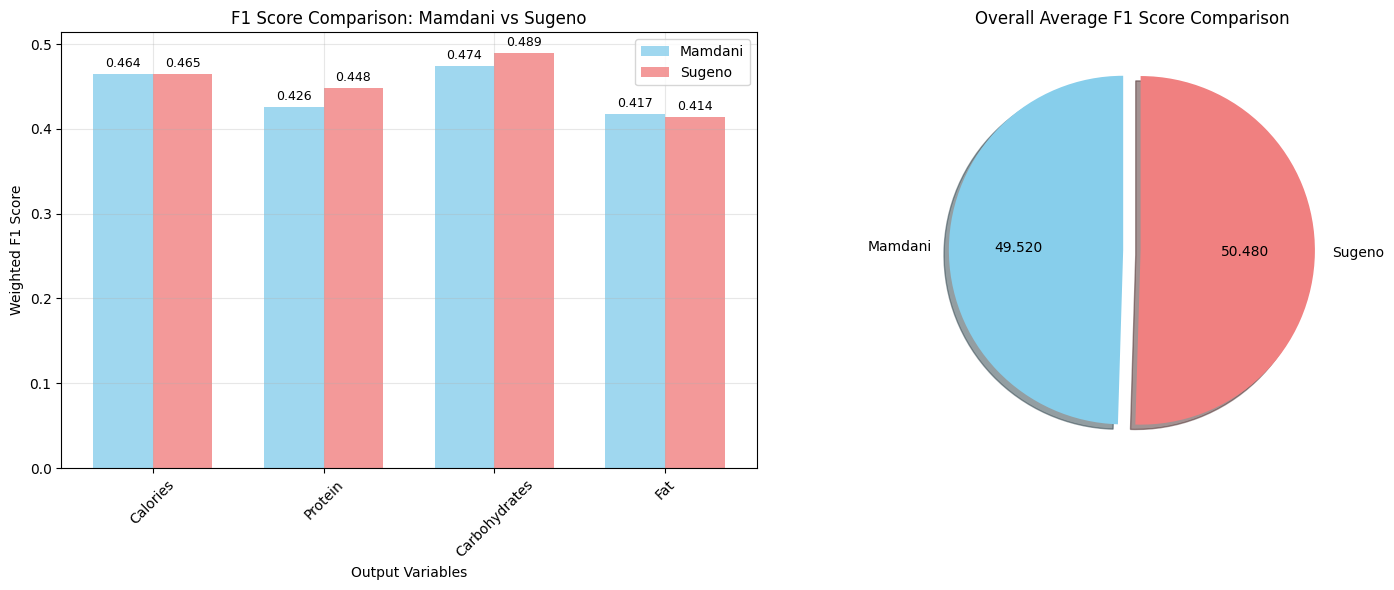

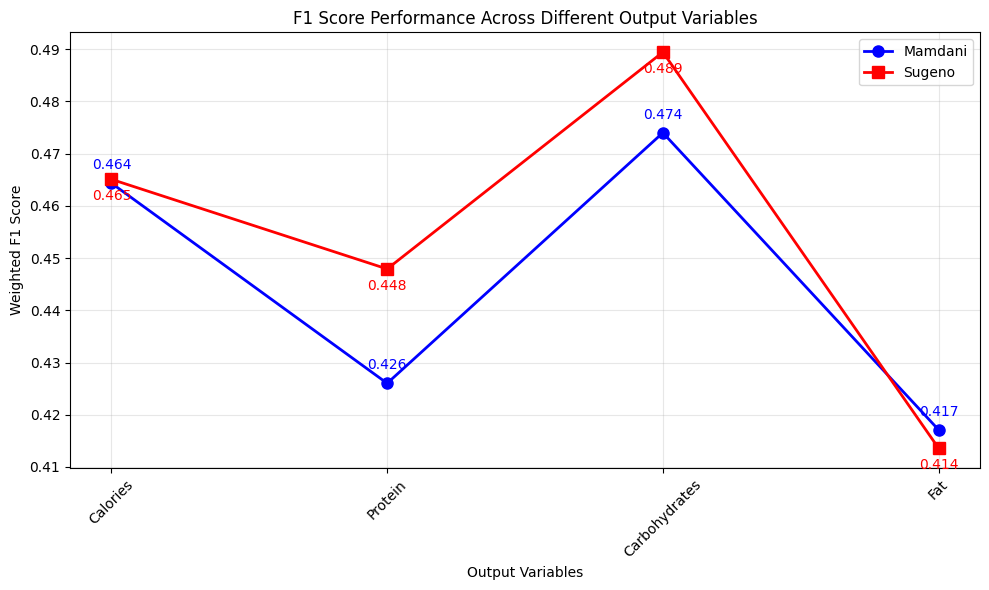

In [372]:
from sklearn.metrics import f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Function to categorize actual and predicted calorie and macro values
def categorize_outputs(values, var_type):
    if var_type == 'Calories':
        if values <= 1800:
            return 'low'
        elif values <= 2400:
            return 'moderate'
        else:
            return 'high'
    elif var_type == 'Protein':
        if values <= 80:
            return 'low'
        elif values <= 120:
            return 'moderate'
        else:
            return 'high'
    elif var_type == 'Carbohydrates':
        if values <= 200:
            return 'low'
        elif values <= 300:
            return 'moderate'
        else:
            return 'high'
    elif var_type == 'Fat':
        if values <= 50:
            return 'low'
        elif values <= 75:
            return 'moderate'
        else:
            return 'high'
    return 'unknown'


# Apply fuzzy logic to all samples in the dataset
mamdani_preds_all = {var: [] for var in rule_output_3in4out.keys()}
sugeno_preds_all = {var: [] for var in rule_output_3in4out.keys()}
actual_categories_all = {var: [] for var in rule_output_3in4out.keys()}

# Use the entire cleaned dataset for evaluation
evaluation_data = df_no_outliers

for idx, row in evaluation_data.iterrows():
    bmi = row['BMI']
    age = row['Ages']
    target = row['Daily Calorie Target']

    # Get rule output
    rule_result = fuzzy_rules_3in4out(bmi, age, target)

    # Mamdani defuzzification and categorization
    mamdani_crisp = mamdani_defuzzification_4out(rule_result, z_samples_dict, mamdani_output_funcs)
    for var in mamdani_preds_all.keys():
        mamdani_preds_all[var].append(categorize_outputs(mamdani_crisp.get(var, 0), var)) # Use .get with default 0

    sugeno_crisp = crisp_output_sugeno_4out(rule_result, constants_outputs)
    for var in sugeno_preds_all.keys():
        sugeno_preds_all[var].append(categorize_outputs(sugeno_crisp.get(var, 0), var)) # Use .get with default 0

    actual_calories = row['Calories']
    actual_protein = row['Protein']
    actual_carbs = row['Carbohydrates']
    actual_fat = row['Fat']

    actual_categories_all['Calories'].append(categorize_outputs(actual_calories, 'Calories'))
    actual_categories_all['Protein'].append(categorize_outputs(actual_protein, 'Protein'))
    actual_categories_all['Carbohydrates'].append(categorize_outputs(actual_carbs, 'Carbohydrates'))
    actual_categories_all['Fat'].append(categorize_outputs(actual_fat, 'Fat'))


print(f"Model Accuracy Comparison (Weighted F1 Score):\n")

mamdani_total_f1 = 0
sugeno_total_f1 = 0
output_vars = list(rule_output_3in4out.keys())

# Store F1 scores for plotting
mamdani_f1_scores = []
sugeno_f1_scores = []

for i, output_var in enumerate(output_vars):
    print(f"--- {output_var} ---")
    le = LabelEncoder()
    all_cats = list(set(actual_categories_all[output_var] + mamdani_preds_all[output_var] + sugeno_preds_all[output_var]))
    le.fit(all_cats)

    actual_encoded = le.transform(actual_categories_all[output_var])
    mamdani_encoded = le.transform(mamdani_preds_all[output_var])
    sugeno_encoded = le.transform(sugeno_preds_all[output_var])

    mamdani_f1 = f1_score(actual_encoded, mamdani_encoded, average='weighted', zero_division=0)
    sugeno_f1 = f1_score(actual_encoded, sugeno_encoded, average='weighted', zero_division=0)

    print(f" Mamdani F1 Score: {mamdani_f1:.4f}")
    print(f" Sugeno F1 Score: {sugeno_f1:.4f}")

    mamdani_f1_scores.append(mamdani_f1)
    sugeno_f1_scores.append(sugeno_f1)
    
    mamdani_total_f1 += mamdani_f1
    sugeno_total_f1 += sugeno_f1
    

print(f"\n--- Overall ---")
print(f" Mamdani Average Weighted F1 Score: {mamdani_total_f1 / len(output_vars):.4f}")
print(f" Sugeno Average Weighted F1 Score: {sugeno_total_f1 / len(output_vars):.4f}")

print(f"\nOverall Better performing model: {'Mamdani' if mamdani_total_f1 > sugeno_total_f1 else 'Sugeno'}")

# Create visualization plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot comparing F1 scores
x = np.arange(len(output_vars))
width = 0.35

bars1 = ax1.bar(x - width/2, mamdani_f1_scores, width, label='Mamdani', alpha=0.8, color='skyblue')
bars2 = ax1.bar(x + width/2, sugeno_f1_scores, width, label='Sugeno', alpha=0.8, color='lightcoral')

ax1.set_xlabel('Output Variables')
ax1.set_ylabel('Weighted F1 Score')
ax1.set_title('F1 Score Comparison: Mamdani vs Sugeno')
ax1.set_xticks(x)
ax1.set_xticklabels(output_vars, rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax1.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    ax1.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

# Overall comparison pie chart
overall_scores = [mamdani_total_f1 / len(output_vars), sugeno_total_f1 / len(output_vars)]
labels = ['Mamdani', 'Sugeno']
colors = ['skyblue', 'lightcoral']
explode = (0.05, 0.05)

ax2.pie(overall_scores, labels=labels, colors=colors, autopct='%1.3f', 
        startangle=90, explode=explode, shadow=True)
ax2.set_title('Overall Average F1 Score Comparison')

plt.tight_layout()
plt.show()

# Additional line plot showing performance across variables
plt.figure(figsize=(10, 6))
plt.plot(output_vars, mamdani_f1_scores, marker='o', linewidth=2, markersize=8, 
         label='Mamdani', color='blue')
plt.plot(output_vars, sugeno_f1_scores, marker='s', linewidth=2, markersize=8, 
         label='Sugeno', color='red')

plt.xlabel('Output Variables')
plt.ylabel('Weighted F1 Score')
plt.title('F1 Score Performance Across Different Output Variables')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Add value annotations
for i, (mamdani_score, sugeno_score) in enumerate(zip(mamdani_f1_scores, sugeno_f1_scores)):
    plt.annotate(f'{mamdani_score:.3f}', (i, mamdani_score), 
                textcoords="offset points", xytext=(0,10), ha='center', color='blue')
    plt.annotate(f'{sugeno_score:.3f}', (i, sugeno_score), 
                textcoords="offset points", xytext=(0,-15), ha='center', color='red')

plt.tight_layout()
plt.show()